In [1]:
from functools import partial

import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from PIL import Image
from skimage.feature import peak_local_max

from utils import get_gaussian_kernel_2nd_order, get_gaussian_kernel

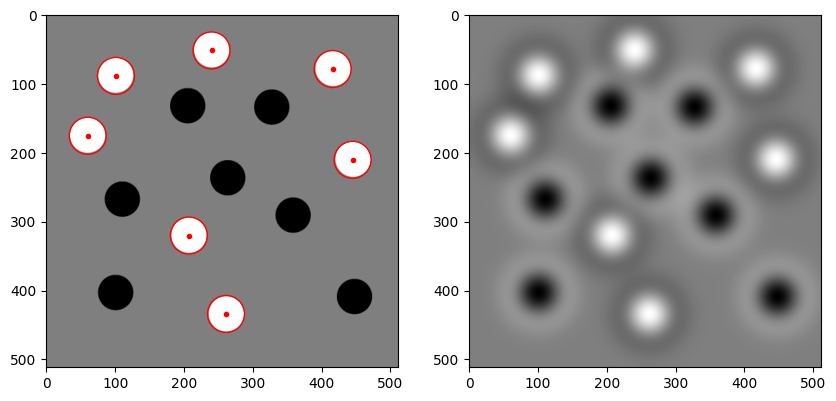

In [2]:
img_orig = Image.open('../data/week2/test_blob_uniform.png')
img_orig = np.array(img_orig)
img_orig = (img_orig - img_orig.mean()) / img_orig.std()

sigma = 19
coords_distance = 30
threshold = 1000

get_intensity = lambda img, treshold, yx: img[int(yx[0]), int(yx[1])] >= treshold

kernel = np.outer(
    get_gaussian_kernel_2nd_order(sigma),
    get_gaussian_kernel(sigma))

img = scipy.signal.convolve(img_orig, kernel, mode='same')
img += scipy.signal.convolve(img_orig, kernel.T, mode='same')


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img_orig, cmap='gray')
ax[1].imshow(img, cmap='gray')

coords = peak_local_max(img, min_distance=coords_distance)
partial_get_intensity = partial(get_intensity, img, threshold)
coords = np.array(list(filter(partial_get_intensity, coords)))
ax[0].plot(coords[:, 1], coords[:, 0], 'r.')

for coord in coords:
    radius = np.sqrt(2) * sigma
    circle = plt.Circle(coord[::-1], radius, color='r', fill=False)
    ax[0].add_artist(circle)

plt.show()